Import Necessary Libraries 

In [1]:
!pip install parsivar

     |████████████████████████████████| 36.2MB 115kB/s 
     |████████████████████████████████| 1.5MB 30.9MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-cp37-none-any.whl size=36492958 sha256=792bb873a4955b732ff193742da26a8791ccfab700d7d8a0c610afdb57226c72
  Stored in directory: /root/.cache/pip/wheels/b4/56/cd/29a045228c81c482429c711646af316ada1218f3029edce37c
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449906 sha256=388ed077e3454f09c2adbf9cf2c9e0ade702099b0da58bbe15ee221e4678c352
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built parsivar nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
!pip install langdetect

     |████████████████████████████████| 983kB 8.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=d7493d2f113fd2a557bdabbbb40ab88d2790cb611a9c3487e8f4cd181dd27d64
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
!pip install finglish

     |████████████████████████████████| 2.4MB 8.7MB/s 


In [4]:
import pandas as pd
from finglish import f2p
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from google.colab import drive
import os
import sys
from IPython.display import clear_output
from langdetect import detect, DetectorFactory
from parsivar import Normalizer
from parsivar import FindStems
from parsivar import Tokenizer
from parsivar import POSTagger
from string import punctuation
import gensim
import seaborn as sns
import statistics
from collections import Counter
import math
from math import inf
import pickle
import json
import ast
import re
import string
from math import log2

Loading converters...
Loading persian word list...
Loading dictionary...


In [10]:
# you should update this cell according to your settings

#  test_data
#       | text_file_1.txt
#       | text_file_2.txt
#       | text_file_3.txt
#       .............
#       | text_file_n.txt


config = {
    "current_working_dir" : "/content/drive/MyDrive/NLP-Spring 99-00/HW1/",
    "test_data_path" : "/content/drive/MyDrive/NLP-Spring 99-00/HW1_TEST/test/", #location of test files
    "model_name" : "model.svm"
}

Mount Drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
normalizer = Normalizer()
tokenizer = Tokenizer()
stemmer = FindStems()
tagger = POSTagger(tagging_model="stanford")
alphabet = ""
with open(config["current_working_dir"] + "persian_alphabet.txt", 'r' , encoding='utf-8') as alphabet_file:
    alphabet = alphabet_file.read().replace("\n" , "").replace("\t" , "")
numbers = "0123456789"

Read Files

In [13]:
def read_files(folderpath , gender):
    data = pd.DataFrame(columns = ['file_path' , 'file_text' , 'gender'])
    list_of_all_files = os.listdir(folderpath)
    for filename in list_of_all_files:
        current_file_path = folderpath + "/" + filename
        current_file_text = ""
        with open(current_file_path , 'r' , encoding='utf-8') as current_file:
             current_file_text = current_file.read()
        
        data = data.append({"file_path" : current_file_path , "file_text" : current_file_text , "gender" : gender}, ignore_index=True)
    return data

In [14]:
female_folder = config['test_data_path'] + "female"
male_folder = config['test_data_path'] + "male"
data = pd.DataFrame(columns = ['file_path' , 'file_text' , 'gender'])
data = data.append(read_files(female_folder , 'f'),ignore_index=True)
data = data.append(read_files(male_folder , 'm'),ignore_index=True)

In [15]:
data.head()

,file_path,file_text,gender
0,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام ما هفته دیگه میریم شایگان گردشگری این هتل...,f
1,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام.من به همراه دوستانم 8 تا 10 دی 89 در این ...,f
2,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام .هتل بسیار عالی بود و واقعا ستاره ها مناس...,f
3,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام \nمن و دوستم هفته گذشته میهمان هتل شما بو...,f
4,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,شاید اتاقی که بعضی ها در آن اقامت داشتن خوب نب...,f


In [16]:
data['normalized_text'] = data['file_text'].apply(lambda text : normalizer.normalize(text))

In [17]:
data['cleaned_number_text'] = data['normalized_text'].apply(lambda text : re.sub(r'\d+', '', text))

In [18]:
data['cleaned_punc_text'] = data['cleaned_number_text'].apply(lambda text : text.translate(str.maketrans('','', string.punctuation)))

In [19]:
data['tokenized_sentence'] = data['normalized_text'].apply(lambda text : tokenizer.tokenize_sentences(text))

In [20]:
def tokenize_words(text):
    if detect(text) != 'fa' and detect(text) != 'ar':
        #convert finglish words to farsi
        tokens = list(map(lambda word : f2p(word) , tokenizer.tokenize_words(text)))
        return tokens
    else:
        return tokenizer.tokenize_words(text)
data['tokenized_word'] = data['cleaned_punc_text'].apply(lambda text : tokenize_words(text))

In [21]:
data.head()

,file_path,file_text,gender,normalized_text,cleaned_number_text,cleaned_punc_text,tokenized_sentence,tokenized_word
0,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام ما هفته دیگه میریم شایگان گردشگری این هتل...,f,سلام ما هفته دیگه میریم شایگان گردشگری این هتل...,سلام ما هفته دیگه میریم شایگان گردشگری این هتل...,سلام ما هفته دیگه میریم شایگان گردشگری این هتل...,[سلام ما هفته دیگه میریم شایگان گردشگری این هت...,"[سلام, ما, هفته, دیگه, میریم, شایگان, گردشگری,..."
1,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام.من به همراه دوستانم 8 تا 10 دی 89 در این ...,f,سلام . من به همراه دوستانم 8 تا 10 دی 89 در ای...,سلام . من به همراه دوستانم تا دی در این هتل...,سلام من به همراه دوستانم تا دی در این هتل ...,"[سلام ., من به همراه دوستانم 8 تا 10 دی 89 د...","[سلام, من, به, همراه, دوستانم, تا, دی, در, این..."
2,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام .هتل بسیار عالی بود و واقعا ستاره ها مناس...,f,سلام . هتل بسیار عالی‌بود و واقعا ستاره‌ها منا...,سلام . هتل بسیار عالی‌بود و واقعا ستاره‌ها منا...,سلام هتل بسیار عالی‌بود و واقعا ستاره‌ها مناس...,"[سلام ., هتل بسیار عالی‌بود و واقعا ستاره‌ها...","[سلام, هتل, بسیار, عالی‌بود, و, واقعا, ستاره‌ه..."
3,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام \nمن و دوستم هفته گذشته میهمان هتل شما بو...,f,سلام \nمن و دوستم هفته گذشته میهمان هتل شما‌بو...,سلام \nمن و دوستم هفته گذشته میهمان هتل شما‌بو...,سلام \nمن و دوستم هفته گذشته میهمان هتل شما‌بو...,"[سلام , من و دوستم هفته گذشته میهمان هتل شما‌...","[سلام, من, و, دوستم, هفته, گذشته, میهمان, هتل,..."
4,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,شاید اتاقی که بعضی ها در آن اقامت داشتن خوب نب...,f,شاید اتاقی که بعضی‌ها در آن اقامت داشتن خوب نب...,شاید اتاقی که بعضی‌ها در آن اقامت داشتن خوب نب...,شاید اتاقی که بعضی‌ها در آن اقامت داشتن خوب نب...,[شاید اتاقی که بعضی‌ها در آن اقامت داشتن خوب ن...,"[شاید, اتاقی, که, بعضی‌ها, در, آن, اقامت, داشت..."


Character Based Features

In [22]:
#length of document
C = data['file_text'].apply(lambda text : len(text))

In [23]:
data['F1'] = C

In [24]:
def count_alphabet(text):
    count = 0
    for ch in text:
        if ch in alphabet:
            count = count + 1
    return count

In [25]:
#number of alphabet characters in each document
data['F2'] = data['normalized_text'].apply(lambda text : count_alphabet(text)) / C

In [26]:
def count_digits(text):
    count = 0
    for ch in text:
        if ch in numbers:
            count = count + 1
    return count

In [27]:
#number of digital characters in each document
data['F3'] = data['normalized_text'].apply(lambda text : count_digits(text)) / C

In [28]:
#number of white space characters in each document
data['F4'] = data['file_text'].apply(lambda text : text.count(" ")) / C

In [29]:
#number of tab characters in each document
data['F5'] = data['file_text'].apply(lambda text : text.count("\t")) / C

In [30]:
def count_special_chars(text):
    count = 0
    for ch in text:
        if ch in punctuation:
            count = count + 1
    return count

In [31]:
#number of digital characters in each document
data['F6'] = data['file_text'].apply(lambda text : count_special_chars(text)) / C

Word Based Features

In [32]:
#number of words in each document
N = data['tokenized_word'].apply(lambda lst : len(lst))
data['N'] = N

In [33]:
data['F7'] = N

In [34]:
#mean of words length in each document
data['F8'] = data['tokenized_word'].apply(lambda lst : statistics.mean(list(map(lambda x : len(x) , lst))))

In [35]:
#number of unique words in each document
V = data['tokenized_word'].apply(lambda lst : len(set(lst)))
data['V'] = V
data['F9'] = V/N

In [36]:
#number of words longer than 4 characters
data['F10'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if len(x) >= 5))/N

In [37]:
#number of words shhorter than 4 characters
data['F11'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if len(x) <= 3))/N

In [38]:
def get_word_by_count(list_of_words , count):
    dict_count = Counter(list_of_words)
    words = []
    for key,value in dict_count.items():
        if value == count:
            words.append(key)
    return len(words)

In [39]:
#Hapax Legomena
data['F12'] = data['tokenized_word'].apply(lambda lst : get_word_by_count(lst , 1))/N

In [40]:
#Hapax Dislegomena
data['F13'] = data['tokenized_word'].apply(lambda lst : get_word_by_count(lst , 2))/N

In [41]:
def Yule_K(v,n,list_of_words):
    val = -1/n
    for i in range(1,v+1):
        val = val + get_word_by_count(list_of_words,i)*(i/n)**2
    val = val * 10**4
    return val

In [42]:
def Simpsons(v,n,list_of_words):
    val = 0
    for i in range(1,v+1):
        try:
            val = val + get_word_by_count(list_of_words,i)*(i/n)*(i-1)/(n-1)
        except ZeroDivisionError:
            return None
    return val

In [43]:
def Sichel(v,list_of_words):
    val = get_word_by_count(list_of_words,2)/v
    return val

In [44]:
def Honores(v,n,list_of_words):
    try:
        val = 100 * (math.log10(n)) / (1 - get_word_by_count(list_of_words,1) / v)
    except ZeroDivisionError:
        return None
    return val

In [45]:
data['F14'] = data.apply(lambda row : Yule_K(row['V'] , row['N'] , row['tokenized_word']) , axis=1)
data['F15'] = data.apply(lambda row : Simpsons(row['V'] , row['N'] , row['tokenized_word']) , axis=1)
data['F16'] = data.apply(lambda row : Sichel(row['V'] , row['tokenized_word']) , axis=1)
data['F17'] = data.apply(lambda row : Honores(row['V'] , row['N'] , row['tokenized_word']) , axis=1)

In [46]:
data['F14'].interpolate(method ='linear', limit_direction ='forward' , inplace=True)
data['F15'].interpolate(method ='linear', limit_direction ='forward' , inplace=True)
data['F16'].interpolate(method ='linear', limit_direction ='forward' , inplace=True)
data['F17'].interpolate(method ='linear', limit_direction ='forward' , inplace=True)

In [47]:
def entropy(list_of_words):
    dict_count = Counter(list_of_words)
    total = sum(dict_count.values())
    return sum(freq / total * log2(total / freq) for freq in dict_count.values())

data['F18'] = data['tokenized_word'].apply(lambda lst : entropy(lst))

In [48]:
def get_count_by_len(list_of_words , length):
    count_list = list(map(lambda x : len(x) , list_of_words))
    dict_count = Counter(count_list)
    return dict_count[length]

# word length histogram
#init F19 to F38
for i in range(1,21):
    feature_name = "F" + str(i + 18)
    data[feature_name] = data['tokenized_word'].apply(lambda lst : get_count_by_len(lst , i))

In [49]:
with open(config['current_working_dir'] + 'Lexicon_Positive.pickle', 'rb') as file:
    lexicon_positive = [normalizer.normalize(x) for x in pickle.load(file)]

In [50]:
#number of positive words in each document
data['F39'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_positive))

In [51]:
with open(config['current_working_dir'] + 'Lexicon_Negative.pickle', 'rb') as file:
    lexicon_negative = [normalizer.normalize(x) for x in pickle.load(file)]

In [52]:
#number of negative words in each document
data['F40'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_negative))

In [53]:
with open(config['current_working_dir'] + 'Lexicon_Anger.pickle', 'rb') as file:
    lexicon_anger = [normalizer.normalize(x) for x in pickle.load(file)]

In [54]:
#number of anger words in each document
data['F41'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_anger))

In [55]:
with open(config['current_working_dir'] + 'Lexicon_Anticipation.pickle', 'rb') as file:
    lexicon_anticipation = [normalizer.normalize(x) for x in pickle.load(file)]

In [56]:
#number of anticipation words in each document
data['F42'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_anticipation))

In [57]:
with open(config['current_working_dir'] + 'Lexicon_Disgust.pickle', 'rb') as file:
    lexicon_disgust = [normalizer.normalize(x) for x in pickle.load(file)]

In [58]:
#number of disgusting words in each document
data['F43'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_disgust))

In [59]:
with open(config['current_working_dir'] + 'Lexicon_Fear.pickle', 'rb') as file:
    lexicon_fear = [normalizer.normalize(x) for x in pickle.load(file)]

In [60]:
#number of fearnig words in each document
data['F44'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_fear))

In [61]:
with open(config['current_working_dir'] + 'Lexicon_Joy.pickle', 'rb') as file:
    lexicon_joy = [normalizer.normalize(x) for x in pickle.load(file)]

In [62]:
#number of joy words in each document
data['F45'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_joy))

In [63]:
with open(config['current_working_dir'] + 'Lexicon_Sadness.pickle', 'rb') as file:
    lexicon_sadness = [normalizer.normalize(x) for x in pickle.load(file)]

In [64]:
#number of sad words in each document
data['F46'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_sadness))

In [65]:
with open(config['current_working_dir'] + 'Lexicon_Surprise.pickle', 'rb') as file:
    lexicon_surprise = [normalizer.normalize(x) for x in pickle.load(file)]

In [66]:
#number of surprising words in each document
data['F47'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_surprise))

In [67]:
with open(config['current_working_dir'] + 'Lexicon_Trust.pickle', 'rb') as file:
    lexicon_trust = [normalizer.normalize(x) for x in pickle.load(file)]

In [68]:
#number of trusting words in each document
data['F48'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in lexicon_trust))

Syntax Based Features

In [69]:
data['F49'] = data['normalized_text'].apply(lambda text : text.count("'"))/C

In [70]:
data['F50'] = data['normalized_text'].apply(lambda text : text.count("،"))/C

In [71]:
data['F51'] = data['normalized_text'].apply(lambda text : text.count("."))/C

In [72]:
data['F52'] = data['normalized_text'].apply(lambda text : text.count(":"))/C

In [73]:
data['F53'] = data['normalized_text'].apply(lambda text : text.count(";"))/C

In [74]:
data['F54'] = data['normalized_text'].apply(lambda text : text.count("؟"))/C

In [75]:
data['F55'] = data['normalized_text'].apply(lambda text : len(re.findall("؟؟+" , text)))/C

In [76]:
data['F56'] = data['normalized_text'].apply(lambda text : text.count("!"))/C

In [77]:
data['F57'] = data['normalized_text'].apply(lambda text : len(re.findall("!!+" , text)))/C

In [78]:
data['F58'] = data['normalized_text'].apply(lambda text : len(re.findall("(\.)(\.)+" , text)))/C

Structural Features

In [79]:
#number of document lines
data['F59'] = data['file_text'].apply(lambda text : text.count("\n"))

In [80]:
#number of sentences in each document
S = data['tokenized_sentence'].apply(lambda lst : len(lst))
data['F60'] = S

In [81]:
#average number of words in each sentence
data['F61'] = data['tokenized_sentence'].apply(lambda lst : statistics.mean(list(map(lambda x : len(tokenizer.tokenize_words(x)) , lst))))

In [82]:
def ratio_of_empty_lines(text):
    all_lines = text.split("\n")
    number_of_empty_lines = 0
    for line in all_lines:
        if len(line.strip()) == 0:
            number_of_empty_lines = number_of_empty_lines + 1
    return number_of_empty_lines / len(all_lines)

In [83]:
data['F62'] = data['file_text'].apply(lambda text : ratio_of_empty_lines(text))

In [84]:
def avg_length_of_nonempty_lines(text):
    all_lines = text.split("\n")
    length_of_non_empty_lines = 0
    number_of_non_empty_lines = 0
    for line in all_lines:
        if len(line.strip()) != 0:
            number_of_non_empty_lines = number_of_non_empty_lines + 1
            length_of_non_empty_lines = length_of_non_empty_lines + len(line)
    try:
        return length_of_non_empty_lines / number_of_non_empty_lines
    except ZeroDivisionError:
        return 0

In [85]:
data['F63'] = data['file_text'].apply(lambda text : avg_length_of_nonempty_lines(text))

Grammer Related Features

In [86]:
#gender specific words
female_words = ["شوهر" , "شوهرم"]
male_words = ["خانمم" , "زنم"]
data['F64'] = data['cleaned_punc_text'].apply(lambda text : sum([1 for word in female_words if word in text])).astype(int)
data['F65'] = data['cleaned_punc_text'].apply(lambda text : sum([1 for word in male_words if word in text])).astype(int)

In [87]:
with open(config['current_working_dir'] + 'interrogative.pickle', 'rb') as file:
    list_of_all_interrogatives = pickle.load(file)

In [88]:
data['F66'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_interrogatives))/N

In [89]:
with open(config['current_working_dir'] + 'conjunctions.pickle', 'rb') as file:
    list_of_all_conjunctions = pickle.load(file)

In [90]:
data['F67'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_conjunctions))/N

In [91]:
with open(config['current_working_dir'] + 'interjections.pickle', 'rb') as file:
    list_of_all_interjections = pickle.load(file)

In [92]:
data['F68'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_interjections))/N

In [93]:
#Part Of Speech Tagger
tags = pd.Series()
for index, row in data.iterrows():
    #delete tagger and re initialize it on every 20 iterations for avoiding java head error
    if index % 20 == 0:
        del tagger
        tagger = POSTagger(tagging_model="stanford")

    clear_output()
    print(str(index))
    tags = tags.append(pd.Series([tagger.parse(row['tokenized_word'])]), ignore_index=True)

377


In [94]:
#number of propositions in each document
data['F69'] = tags.apply(lambda lst : sum(1 for tag in lst if tag[1] == 'PO')) / N

Linguistic-Psychological Features

In [95]:
polarity_df = pd.read_csv(config['current_working_dir'] + 'PersianSWN.csv' , sep='\t' , names = ["id" , "word" , "conf" , "plus" , "minus"] ,header=None)
polarity_df.drop("id" , axis=1 , inplace=True)
polarity_df["plus_prob"] = polarity_df["conf"] * polarity_df["plus"]
polarity_df["minus_prob"] = polarity_df["conf"] * polarity_df["minus"]
polarity_df.drop("plus" , axis=1 , inplace=True)
polarity_df.drop("minus" , axis=1 , inplace=True)

In [96]:
ploar_plus = polarity_df.groupby("word")["plus_prob"].mean().reset_index()
ploar_minus = polarity_df.groupby("word")["minus_prob"].mean().reset_index()
word_polatiry = pd.merge(ploar_plus , ploar_minus , how="inner" , on="word")

In [97]:
good_words = word_polatiry[(word_polatiry["plus_prob"] > word_polatiry["minus_prob"] + 0.15) & (word_polatiry["plus_prob"] > 0.2)]["word"].unique()
bad_words = word_polatiry[(word_polatiry["minus_prob"] > word_polatiry["plus_prob"] + 0.15) & (word_polatiry["minus_prob"] > 0.2)]["word"].unique()

In [98]:
good_words = list(map(lambda x : normalizer.normalize(x) , good_words))
bad_words = list(map(lambda x : normalizer.normalize(x) , bad_words))

In [99]:
data['F70'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in good_words))

In [100]:
data['F71'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in bad_words))

In [101]:
with open(config['current_working_dir'] + 'colors.pickle', 'rb') as file:
    list_of_all_colors = pickle.load(file)

In [102]:
#number of colors in each document
data['F72'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_colors))

In [103]:
#number of adjectives in each document
data['F73'] = tags.apply(lambda lst : sum(1 for tag in lst if tag[1] == 'ADJ'))

In [104]:
#number of adverbs in each document
data['F74'] = tags.apply(lambda lst : sum(1 for tag in lst if tag[1] == 'ADV'))

In [105]:
#number of pronouns in each document
data['F75'] = tags.apply(lambda lst : sum(1 for tag in lst if tag[1] == 'PRO'))

In [106]:
with open(config['current_working_dir'] + 'doubt.pickle', 'rb') as file:
    list_of_all_doubt = pickle.load(file)

In [107]:
#number of doubt words in each document
data['F76'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_doubt))

In [108]:
with open(config['current_working_dir'] + 'certainty.pickle', 'rb') as file:
    list_of_all_certainties = pickle.load(file)

In [109]:
#number of certainty words in each document
data['F77'] = data['tokenized_word'].apply(lambda lst : sum(1 for x in lst if x in list_of_all_certainties))

In [110]:
#greeting
greetings = ["سلام" , "خوبید"]
data['F78'] = data['cleaned_punc_text'].apply(lambda text : sum([1 for word in greetings if word in text]) >= 1).astype(int)

In [111]:
#farewell
farewells = ["خداحافظ" , "خدانگهدار"]
data['F79'] = data['cleaned_punc_text'].apply(lambda text : sum([1 for word in farewells if word in text]) >= 1).astype(int)

In [112]:
data.tail()

,file_path,file_text,gender,normalized_text,cleaned_number_text,cleaned_punc_text,tokenized_sentence,tokenized_word,F1,F2,F3,F4,F5,F6,N,F7,F8,V,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,...,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68,F69,F70,F71,F72,F73,F74,F75,F76,F77,F78,F79
373,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,نظر سلمان رو تایید میکنم\n\nدوست عزیز اگه نظرا...,m,نظر سلمان رو تایید میکنم\nدوست عزیز اگه نظرات ...,نظر سلمان رو تایید میکنم\nدوست عزیز اگه نظرات ...,نظر سلمان رو تایید میکنم\nدوست عزیز اگه نظرات ...,"[نظر سلمان رو تایید میکنم , دوست عزیز اگه نظرا...","[نظر, سلمان, رو, تایید, میکنم, دوست, عزیز, اگه...",189,0.708995,0.000000,0.206349,0.0,0.063492,33,33,4.090909,29,0.878788,0.393939,0.333333,0.787879,0.060606,91.827365,0.009470,0.068966,1467.896809,4.779094,2,6,3,9,8,1,3,0,1,0,0,0,...,1,1,0,0,1,3,0,0,3,0.0,0.000000,0.037037,0.00000,0.0,0.0,0.0,0.000000,0.0,0.010582,4,5,8.200000,0.400000,61.666667,0,0,0.060606,0.121212,0.000000,0.000000,0,0,0,3,1,0,0,0,0,0
374,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,به دوستی که گفتن علت انتخاب این هتل نظرات دوست...,m,به دوستی که گفتن علت انتخاب این هتل نظرات دوست...,به دوستی که گفتن علت انتخاب این هتل نظرات دوست...,به دوستی که گفتن علت انتخاب این هتل نظرات دوست...,[به دوستی که گفتن علت انتخاب این هتل نظرات دوس...,"[به, دوستی, که, گفتن, علت, انتخاب, این, هتل, ن...",340,0.752941,0.000000,0.205882,0.0,0.020588,72,72,3.625000,54,0.750000,0.263889,0.472222,0.597222,0.069444,100.308642,0.010172,0.092593,911.781407,5.589724,6,13,15,19,11,5,1,2,0,0,0,0,...,4,3,0,3,2,2,4,0,3,0.0,0.008824,0.014706,0.00000,0.0,0.0,0.0,0.000000,0.0,0.002941,4,4,19.250000,0.600000,168.000000,0,0,0.013889,0.069444,0.000000,0.083333,0,0,0,8,1,2,0,0,0,0
375,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,هتل سارا واقعا هتل خوبی نیست ما از 9 تا 12 اون...,m,هتل سارا واقعا هتل خوبی نیست ما از 9 تا 12 اون...,هتل سارا واقعا هتل خوبی نیست ما از تا اونجا‌...,هتل سارا واقعا هتل خوبی نیست ما از تا اونجا‌...,[هتل سارا واقعا هتل خوبی نیست ما از 9 تا 12 او...,"[هتل, سارا, واقعا, هتل, خوبی, نیست, ما, از, تا...",324,0.756173,0.012346,0.222222,0.0,0.009259,63,63,3.952381,50,0.793651,0.301587,0.460317,0.666667,0.079365,100.781053,0.010241,0.100000,1124.587843,5.489107,1,14,14,15,8,7,1,0,2,0,1,0,...,3,1,1,0,1,1,1,2,1,0.0,0.000000,0.009259,0.00000,0.0,0.0,0.0,0.000000,0.0,0.003086,0,2,33.500000,0.000000,324.000000,0,0,0.063492,0.126984,0.015873,0.126984,0,0,0,6,5,2,0,0,0,0
376,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,سلام ما از 17 تا 20 فروردین تو این هتل بودیم.ا...,m,سلام ما از 17 تا 20 فروردین تو این هتل‌بودیم ....,سلام ما از تا فروردین تو این هتل‌بودیم . اول...,سلام ما از تا فروردین تو این هتل‌بودیم اول ...,[سلام ما از 17 تا 20 فروردین تو این هتل‌بودیم ...,"[سلام, ما, از, تا, فروردین, تو, این, هتل‌بودیم...",493,0.764706,0.018256,0.186613,0.0,0.026369,100,100,3.830000,79,0.790000,0.260000,0.470000,0.650000,0.090000,60.000000,0.006061,0.113924,1128.571429,6.161210,4,26,17,27,9,10,1,0,4,2,0,0,...,5,2,4,2,6,2,3,1,2,0.0,0.004057,0.018256,0.00000,0.0,0.0,0.0,0.008114,0.0,0.000000,0,13,8.923077,0.000000,493.000000,0,0,0.050000,0.140000,0.000000,0.100000,0,1,0,8,5,6,0,0,1,0
377,/content/drive/MyDrive/NLP-Spring 99-00/HW1_TE...,من باتفاق همسر و دو پسرم درروزهای 7 الی 10 فرو...,m,من باتفاق همسر و دو پسرم درروزهای 7 الی 10 فرو...,من باتفاق همسر و دو پسرم درروزهای الی فروردی...,من باتفاق همسر و دو پسرم درروزهای الی فروردی...,[من باتفاق همسر و دو پسرم درروزهای 7 الی 10 فر...,"[من, باتفاق, همسر, و, دو, پسرم, درروزهای, الی,...",1149,0.779809,0.006963,0.197563,0.0,0.006963,216,216,4.236111,151,0.699074,0.421296,0.398148,0.601852,0.046296,93.021262,0.009345,0.066225,1678.583412,6.826890,15,36,35,39,38,20,18,9,2,3,1,0,...,12,4,6,4,3,7,6,1,19,0.0,0.004352,0.006092,0.00087,0.0,0.0,0.0,0.000000,0.0,0.000000,5,9,25.333333,0.166667,228.800000,0,0,0.023148,0.074074,0.000000,0.120370,4,3,0,22,8,9,0,1,0,0


**Classification**

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Add word2vec features

In [114]:
model = gensim.models.KeyedVectors.load_word2vec_format(config["current_working_dir"] + "blog.vec", binary=False)

In [115]:
lst = []
for index, row in data.iterrows():
    lst_i = []
    for x in row['tokenized_word']:
        if x in model.vocab:
            lst_i.append(model.get_vector(x))
    lst.append(np.mean(lst_i , axis=0).tolist())

In [116]:
df_w2v = pd.DataFrame(lst , columns=[("W" + str(i)) for i in range(1,301)])

In [117]:
df_w2v.head()

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,...,W261,W262,W263,W264,W265,W266,W267,W268,W269,W270,W271,W272,W273,W274,W275,W276,W277,W278,W279,W280,W281,W282,W283,W284,W285,W286,W287,W288,W289,W290,W291,W292,W293,W294,W295,W296,W297,W298,W299,W300
0,-0.691332,0.752105,0.344341,0.447159,0.155724,-0.028611,-0.183834,-0.876068,0.342510,0.297007,0.064370,-0.647382,-0.936682,0.111092,-1.368617,-0.818955,0.488119,-1.073433,0.791655,0.694958,-1.061167,-0.691887,0.100057,-0.421473,0.869959,-0.399444,0.181894,-0.371137,-1.508763,1.061764,0.840376,-1.024842,0.622652,0.582374,0.129866,-0.550024,0.654617,0.489562,-0.754868,-0.292927,...,0.080834,0.578308,-0.042275,-1.076235,1.070080,-0.381166,-0.960918,0.556835,-0.530896,0.632585,-0.485543,-0.706336,-0.364775,-0.683213,-0.772163,-0.720743,-0.262847,-0.199783,-0.799256,-0.701886,0.242674,0.060080,0.210312,0.134172,0.783036,0.807494,-0.659003,-0.798489,0.538259,0.355882,1.055293,-0.031336,1.244722,0.502595,0.896079,0.192519,0.381144,-1.316861,-0.327774,-0.984820
1,-0.758529,0.443169,0.615476,0.477470,0.076151,0.285394,0.181050,-0.811640,0.340440,-0.133189,-0.630096,-0.018473,-0.158088,-0.494209,-0.688396,-0.653667,0.428541,-0.451214,-0.561244,-0.166950,-0.004228,-0.157630,0.009098,-0.359333,0.353128,0.073837,-0.021243,0.232722,-0.322246,0.221537,0.657793,-0.734405,-0.010757,0.078443,-0.291860,-0.053989,0.401705,-0.278479,0.180760,-0.308311,...,-0.515819,-0.124397,0.366663,-0.699557,-0.013688,-0.169284,0.158980,0.035618,-0.247631,0.137103,0.036677,-0.559395,-0.209451,0.442753,-0.369363,0.347551,-0.518436,-0.152951,-0.230735,-0.520853,0.446806,0.060037,-0.407042,-0.501124,0.334949,0.187009,0.063387,-0.195551,0.558549,-0.043856,-0.352902,-0.098468,0.451869,0.648682,-0.085619,-0.237506,-0.103204,-0.308220,-0.555433,0.494179
2,-0.928609,0.340612,0.093499,0.611583,-0.221910,-0.163419,1.148099,-0.753513,0.886397,-0.497588,-0.430289,-0.091468,-0.649291,-0.214556,-0.768361,-0.650838,0.025706,-0.940181,-0.444483,-0.753953,0.053906,-0.082108,-0.225377,0.150882,0.640519,0.149359,-0.062357,-0.625751,-0.617286,0.427552,1.313961,-1.343974,0.470436,0.088695,0.076748,-0.597531,1.002533,-0.162747,0.316089,-0.091322,...,-0.772972,-0.583321,0.819212,0.342749,0.518968,-0.299771,0.097721,0.448885,0.515093,0.174725,-0.123333,0.027431,-0.224626,-0.351143,-0.236441,0.594825,-0.661900,0.109290,-0.689418,-0.125416,0.770949,-0.091027,-0.588754,-0.435437,0.189885,-0.284900,-0.550425,-0.208055,0.356945,-0.411072,0.495046,-0.718461,0.493195,0.368701,0.063252,0.256204,-0.677132,-0.627119,-0.443141,-0.011797
3,-0.293319,1.294163,-1.241264,0.584864,0.067599,-0.554609,-0.811301,-0.876261,0.790012,0.939029,-0.188015,-0.056450,-0.584407,0.149045,-0.288426,-0.494582,0.363578,-0.384413,0.267813,-0.608551,-0.995815,-0.487034,0.413124,0.790232,0.371860,-0.517889,0.387269,0.260507,-1.250677,0.072175,1.563051,-0.894102,-0.213418,1.490979,1.336201,-0.467918,0.074667,0.887691,0.131269,-0.524811,...,1.005700,0.098414,-0.205788,-0.456049,-0.038524,0.711731,-0.844525,-0.179791,0.946688,-0.225976,-0.464102,0.126784,-0.487644,-0.372697,-0.589467,-0.242797,0.001321,-0.557811,-0.382017,-0.366133,0.041169,-0.151865,-0.533463,0.002299,0.948496,0.675999,-0.748648,-1.756819,-0.917994,-1.013572,0.376332,-0.549994,1.385829,-0.614410,0.240226,0.378037,0.642492,-0.113237,0.224785,-0.904482
4,-1.316030,-0.399499,0.955154,0.665916,0.073575,0.356100,-0.368718,-0.598464,1.242473,-0.023523,-0.196397,-0.263022,-0.356533,-0.534530,-1.410400,-0.687666,-0.141827,-0.925686,-0.339570,-0.265378,-0.190582,-0.096611,-0.045814,-0.587661,0.585012,0.042281,-0.067444,-0.262490,-0.872593,0.587729,1.083840,-1.179895,0.198023,-0.152987,-0.021825,-0.088767,0.188745,0.073067,0.029431,-0.329186,...,-0.569721,-0.259681,0.563171,-0.710034,0.077603,-0.356539,-0.449032,-0.106455,-0.184190,0.612778,0.104512,-0.785092,-0.351607,0.186569,-0.661397,-0.130094,0.033583,-0.1541

In [118]:
data_total = pd.concat([data, df_w2v], axis=1)

In [119]:
x = data_total.filter(axis=1 , regex="[F+W].*")

y = data['gender'].copy()
y[y == 'f'] = 0
y[y == 'm'] = 1
y=y.astype('int')

rs = 4

In [120]:
x , y =  shuffle(x, y , random_state=rs)

In [121]:
x.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,...,W261,W262,W263,W264,W265,W266,W267,W268,W269,W270,W271,W272,W273,W274,W275,W276,W277,W278,W279,W280,W281,W282,W283,W284,W285,W286,W287,W288,W289,W290,W291,W292,W293,W294,W295,W296,W297,W298,W299,W300
87,283,0.763251,0.003534,0.201413,0.0,0.031802,56,3.892857,0.785714,0.357143,0.446429,0.678571,0.089286,210.459184,0.021429,0.113636,1282.004553,5.200212,8,7,10,11,7,6,6,0,1,0,0,0,0,0,0,0,0,0,0,0,3,8,...,-0.008039,-0.453894,0.279261,-0.010939,0.050239,-0.290896,-0.003353,0.177667,-0.512740,0.287966,-0.082147,-0.054458,0.135946,0.266192,-0.109262,0.119083,-0.524631,0.435736,0.098680,-0.125160,0.304567,-0.230482,0.106658,-0.789958,0.210188,-0.515594,-0.609395,0.412777,0.310822,0.361089,-0.220283,-0.253185,0.239814,0.918536,0.230904,0.361989,-0.576264,-0.494723,-0.823518,-0.020845
360,1400,0.753571,0.009286,0.179286,0.0,0.044286,266,4.045113,0.695489,0.375940,0.413534,0.582707,0.052632,86.777093,0.008710,0.075676,1495.343676,7.117551,18,48,44,56,48,26,16,3,3,0,2,1,1,0,0,0,0,0,0,0,30,13,...,0.049107,-0.133932,0.348529,-0.168001,0.006389,-0.082052,-0.340154,-0.074771,-0.431966,0.330413,-0.032346,-0.013439,0.080672,-0.134210,-0.410947,-0.271770,-0.217212,0.078464,0.051667,-0.440697,0.272041,-0.164692,-0.186419,-0.240835,0.303124,-0.264707,-0.216807,-0.004695,0.303234,0.086568,-0.295820,-0.596798,1.125899,0.422173,0.686574,0.041221,-0.008054,-0.461362,-0.403149,-0.405335
197,131,0.755725,0.038168,0.167939,0.0,0.030534,24,4.125000,0.916667,0.458333,0.333333,0.833333,0.083333,69.444444,0.007246,0.090909,1518.232366,4.418296,0,4,4,5,8,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,...,-0.135391,-0.608532,0.390762,0.194072,0.092947,-0.148465,-1.341898,-0.269678,0.110268,0.353203,-1.062408,-0.890146,0.953840,-0.962475,-0.432591,-0.081239,-0.045686,-0.020535,0.155136,-0.354501,0.630455,-0.573552,-0.521448,-0.164565,0.915738,0.231423,0.686558,-0.705744,0.029863,0.203566,0.596697,-1.241476,1.176725,0.173575,0.848325,0.140038,0.620328,0.262069,0.252038,-0.619829
174,61,0.803279,0.000000,0.163934,0.0,0.000000,14,3.642857,0.928571,0.214286,0.357143,0.857143,0.071429,102.040816,0.010989,0.076923,1489.966446,3.664498,2,1,2,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,-0.525523,0.853008,0.122721,-1.308898,0.524887,-0.249543,-0.745035,-0.230595,0.041402,0.378151,-0.413782,0.205330,0.060755,-0.363996,-0.046419,-0.832390,-0.617006,0.565199,-0.249459,-0.087429,-0.773596,0.596043,0.103057,0.175982,0.398277,0.162708,-1.293447,-0.248810,1.807021,-0.107623,-0.005343,0.653081,1.249166,0.346344,0.456929,0.097236,-0.533012,-0.325117,-0.390194,-1.750221
122,591,0.698816,0.005076,0.238579,0.0,0.028765,112,3.767857,0.660714,0.330357,0.517857,0.500000,0.080357,125.956633,0.012709,0.121622,842.456298,5.916369,7,29,22,17,20,8,5,1,0,2,0,1,0,0,0,0,0,0,0,0,13,5,...,0.111394,-0.393995,0.190925,-0.415374,0.071690,-0.216088,-0.150560,-0.062690,-0.160927,0.136431,-0.445457,-0.387711,-0.033519,0.093315,-0.701387,0.121416,-0.556925,-0.055751,0.139494,-0.515318,0.452948,-0.095484,-0.103294,-0.539424,0.443919,0.199973,-0.427545,-0.092247,0.325334,0.003357,0.314480,-0.148800,0.502508,0.188873,0.059508,-0.698869,0.363441,-0.363082,-0.444825,-0.025771


In [122]:
with open(config['current_working_dir'] + config['model_name'], "rb") as f:
    while True:
        try:
            min_max_scaler = pickle.load(f)
            variance_threshold = pickle.load(f)
            clf = pickle.load(f)
        except EOFError:
            break

In [123]:
#transform all feature's values to range [0 1]
x = pd.DataFrame(min_max_scaler.transform(x))

In [124]:
x.fillna(0 , inplace=True)

In [125]:
x = pd.DataFrame(variance_threshold.transform(x))

In [126]:
x.fillna(0 , inplace=True)

In [127]:
y_pred = clf.predict(x)
acc = accuracy_score(y_pred , y)

In [132]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0.006574,0.425253,0.033250,0.231703,0.500703,0.383966,0.421941,0.504219,0.167089,0.151613,0.184337,0.171732,0.839510,0.106195,0.202586,0.24,0.182692,0.194030,0.157895,0.066667,0.444444,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275862,0.08,0.233333,0.000000,0.259259,0.290909,0.304348,0.212121,0.227273,0.060266,0.0000,...,0.547988,0.512274,0.537006,0.380896,0.327081,0.593055,0.652553,0.435567,0.569008,0.387609,0.664102,0.633605,0.544374,0.504005,0.616506,0.422295,0.598611,0.284057,0.459526,0.391445,0.613832,0.462957,0.537104,0.502555,0.440318,0.472994,0.400841,0.380795,0.402402,0.345621,0.441959,0.421961,0.618598,0.502294,0.280272,0.530706,0.393816,0.539113,0.610767,0.651206
1,0.056093,0.408175,0.085106,0.275404,0.871795,0.461538,0.423077,0.807692,0.338462,0.123077,0.283333,0.169989,0.545887,0.008850,0.004310,0.02,0.048077,0.014925,0.000000,0.000000,0.111111,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.00,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.171395,0.0000,...,0.698446,0.484757,0.377322,0.399289,0.318080,0.609314,0.757667,0.601263,0.645974,0.261879,0.650504,0.655052,0.700736,0.411040,0.633207,0.489093,0.625955,0.226821,0.315202,0.282824,0.565504,0.483729,0.354638,0.538422,0.327030,0.524951,0.326904,0.346442,0.121294,0.292757,0.535798,0.477264,0.429809,0.601864,0.275514,0.549770,0.537244,0.467628,0.624446,0.507423
2,0.277512,0.398892,0.140351,0.222222,0.947917,0.437500,0.375000,0.921875,0.137500,0.040323,0.109677,0.493782,0.592821,0.000000,0.012931,0.05,0.019231,0.014925,0.026316,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.08,0.033333,0.058824,0.037037,0.036364,0.043478,0.000000,0.030303,0.000000,0.0000,...,0.551891,0.700436,0.376240,0.157970,0.269125,0.734764,0.702613,0.510225,0.597934,0.461412,0.470917,0.542407,0.366891,0.355396,0.613166,0.599406,0.593896,0.337812,0.417145,0.346511,0.624981,0.434346,0.619536,0.543266,0.256205,0.372042,0.332723,0.292543,0.424405,0.278327,0.395939,0.463042,0.575784,0.551457,0.287621,0.438430,0.515499,0.576037,0.590754,0.706390
3,0.000000,0.614184,0.054237,0.287037,0.756944,0.437500,0.437500,0.713542,0.275000,0.230496,0.248780,0.172749,0.626511,0.044248,0.047414,0.03,0.076923,0.014925,0.078947,0.133333,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025862,0.04,0.033333,0.058824,0.037037,0.036364,0.043478,0.060606,0.030303,0.000000,0.0000,...,0.598335,0.531070,0.457914,0.361909,0.407149,0.425715,0.745587,0.458563,0.646081,0.437434,0.611775,0.622722,0.420715,0.404192,0.576287,0.536262,0.662305,0.325754,0.495603,0.436286,0.672236,0.422933,0.547401,0.548427,0.404782,0.395776,0.315377,0.593259,0.354182,0.289937,0.462784,0.349928,0.579313,0.582958,0.309120,0.489094,0.503895,0.528760,0.532287,0.549870
4,0.000000,0.410428,0.223602,0.175084,1.000000,0.272727,0.515152,1.000000,0.000000,0.000000,0.000000,0.123341,0.605656,0.008850,0.047414,0.03,0.009615,0.014925,0.026316,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051724,0.08,0.066667,0.058824,0.111111,0.072727,0.000000,0.090909,0.045455,0.000000,0.0874,...,0.600618,0.706404,0.477103,0.619454,0.411267,0.518829,0.597104,0.627663,0.694582,0.514194,0.433318,0.625503,0.682646,0.470452,0.550042,0.499063,0.638102,0.237621,0.498165,0.212610,0.470405,0.516200,0.480628,0.457254,0.271662,0.299537,0.405646,0.423330,0.581865,0.268994,0.296640,0.404880,0.549430,0.812059,0.358100,0.442625,0.452170,0.547960,0.724073,0.754283


In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [129]:
confusion_matrix(y, y_pred)

array([[111,  78],
       [ 76, 113]])

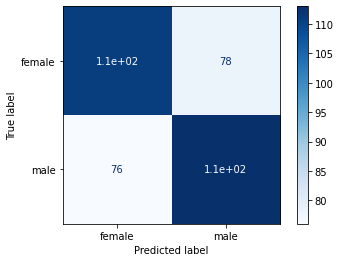

In [130]:
 plot_confusion_matrix(clf, x, y,display_labels=['female' , 'male'],cmap=plt.cm.Blues)

In [131]:
acc

0.5925925925925926